In [1]:

from google.colab import files

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [3]:
# Make plots look nicer
plt.style.use("default")
sns.set_theme()


print("upload your heart_disease_uci.csv file")
uploaded = files.upload()  # choose file from Downloads

# IMPORTANT: make sure the name matches your file exactly
file_name = "heart_disease_uci.csv"
df = pd.read_csv(file_name)

print("\n✅ Dataset loaded successfully!")
print("Shape of dataset (rows, columns):", df.shape)

print("\nFirst 5 rows of dataset:")
display(df.head())

print("\nDataset info:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())

upload your heart_disease_uci.csv file


Saving heart_disease_uci.csv to heart_disease_uci.csv

✅ Dataset loaded successfully!
Shape of dataset (rows, columns): (920, 16)

First 5 rows of dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Summary statistics:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [4]:
print("\nMissing values per column:")
missing_counts = df.isna().sum()
print(missing_counts)

print("\nMissing percentage per column:")
missing_pct = df.isna().mean() * 100
print(missing_pct)


Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Missing percentage per column:
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64



Columns with >30% missing values (will be dropped): ['slope', 'ca', 'thal']


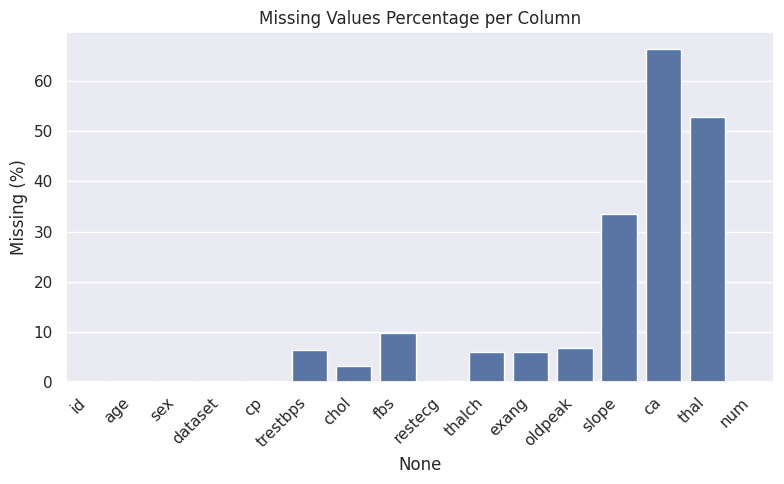

In [15]:
# For your report: show which columns will be dropped (>30% missing)
cols_to_drop = missing_pct[missing_pct > 30].index.tolist()
print("\nColumns with >30% missing values (will be dropped):", cols_to_drop)

# Optional: visualize missingness
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_pct.index, y=missing_pct.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Missing (%)")
plt.title("Missing Values Percentage per Column")
plt.tight_layout()
plt.show()




Value counts for original target column 'num':
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Value counts for binary target (0 = no disease, 1 = disease):
target
1    509
0    411
Name: count, dtype: int64


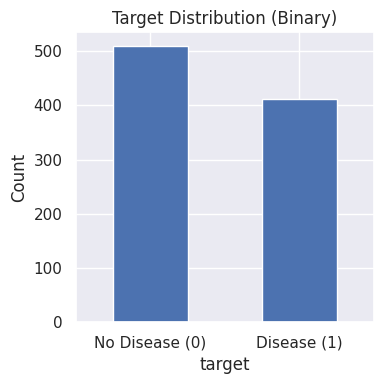

In [16]:
print("\nValue counts for original target column 'num':")
print(df["num"].value_counts())

# Create binary target for easier classification: 0 vs 1
df["target"] = (df["num"] > 0).astype(int)

print("\nValue counts for binary target (0 = no disease, 1 = disease):")
print(df["target"].value_counts())

plt.figure(figsize=(4, 4))
df["target"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["No Disease (0)", "Disease (1)"], rotation=0)
plt.title("Target Distribution (Binary)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [17]:
# 4.1 Drop high-missing columns and ID/original target columns
df_clean = df.drop(columns=cols_to_drop)
df_clean = df_clean.drop(columns=["id", "num"])  # keep only 'target' as label

print("\nColumns after dropping high-missing & ID/num:")
print(df_clean.columns)

# 4.2 Split into features (X) and target (y)
X = df_clean.drop(columns=["target"])
y = df_clean["target"]

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# 4.3 Identify numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric features:", num_cols)
print("Categorical features:", cat_cols)

# 4.4 Define transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# 4.5 Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("\n✅ Train-test split done.")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())





Columns after dropping high-missing & ID/num:
Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'target'],
      dtype='object')

Feature matrix shape: (920, 11)
Target vector shape: (920,)

Numeric features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
Categorical features: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang']

✅ Train-test split done.
X_train: (736, 11) X_test: (184, 11)
y_train distribution:
 target
1    407
0    329
Name: count, dtype: int64
y_test distribution:
 target
1    102
0     82
Name: count, dtype: int64


In [18]:
# 4.1 Drop high-missing columns and ID/original target columns
df_clean = df.drop(columns=cols_to_drop)
df_clean = df_clean.drop(columns=["id", "num"])  # keep only 'target' as label

print("\nColumns after dropping high-missing & ID/num:")
print(df_clean.columns)

# 4.2 Split into features (X) and target (y)
X = df_clean.drop(columns=["target"])
y = df_clean["target"]

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# 4.3 Identify numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric features:", num_cols)
print("Categorical features:", cat_cols)

# 4.4 Define transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# 4.5 Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("\n✅ Train-test split done.")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())





Columns after dropping high-missing & ID/num:
Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'target'],
      dtype='object')

Feature matrix shape: (920, 11)
Target vector shape: (920,)

Numeric features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
Categorical features: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang']

✅ Train-test split done.
X_train: (736, 11) X_test: (184, 11)
y_train distribution:
 target
1    407
0    329
Name: count, dtype: int64
y_test distribution:
 target
1    102
0     82
Name: count, dtype: int64



🔹 Training Logistic Regression model...

=== Logistic Regression Results ===
Accuracy on test set: 0.8369565217391305

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Confusion Matrix:
[[65 17]
 [13 89]]

🌲 Training Random Forest model...

=== Random Forest Results ===
Accuracy on test set: 0.8260869565217391

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        82
           1       0.82      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

Confusion Matrix:
[[63 19]
 [13 89]

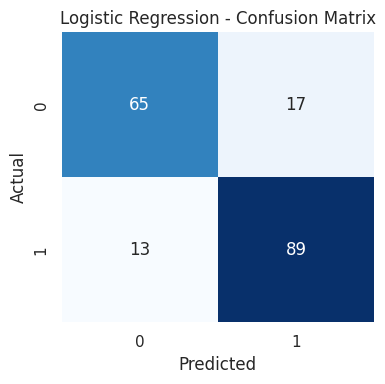

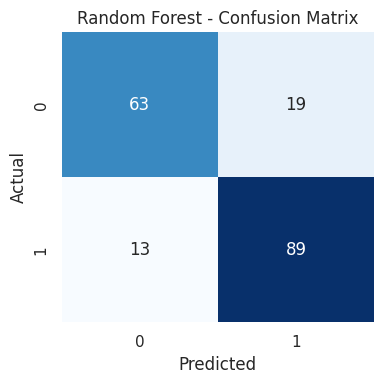

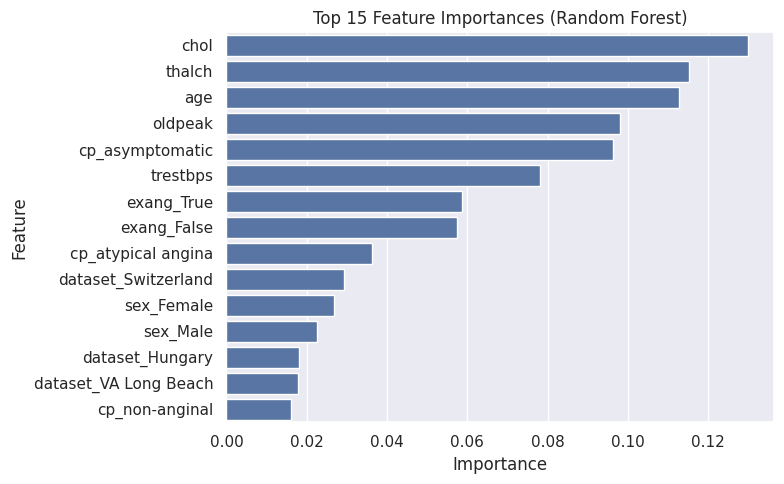


✅ All steps completed: preprocessing, modelling, validation, and plots.


In [20]:
# 5.1 Logistic Regression Model
log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

print("\n🔹 Training Logistic Regression model...")
log_reg_pipeline.fit(X_train, y_train)
y_pred_log = log_reg_pipeline.predict(X_test)

log_acc = accuracy_score(y_test, y_pred_log)
print("\n=== Logistic Regression Results ===")
print("Accuracy on test set:", log_acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


# 5.2 Random Forest Model
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

print("\n🌲 Training Random Forest model...")
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
print("\n=== Random Forest Results ===")
print("Accuracy on test set:", rf_acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



print("\n🔄 Performing 5-Fold Stratified Cross-Validation...")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression CV
log_cv_scores = cross_val_score(
    log_reg_pipeline, X, y,
    cv=cv,
    scoring="accuracy"
)
print("\n=== Logistic Regression 5-Fold CV ===")
print("Fold accuracies:", log_cv_scores)
print("Mean CV accuracy:", log_cv_scores.mean())

# Random Forest CV
rf_cv_scores = cross_val_score(
    rf_pipeline, X, y,
    cv=cv,
    scoring="accuracy"
)
print("\n=== Random Forest 5-Fold CV ===")
print("Fold accuracies:", rf_cv_scores)
print("Mean CV accuracy:", rf_cv_scores.mean())



def plot_confusion(cm, title):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_confusion(cm_log, "Logistic Regression - Confusion Matrix")
plot_confusion(cm_rf, "Random Forest - Confusion Matrix")




# Get feature names after preprocessing
# numeric names stay same; categorical become one-hot encoded names
ohe = rf_pipeline.named_steps["preprocess"].named_transformers_["cat"].named_steps["encoder"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([num_cols, cat_feature_names])
rf_model = rf_pipeline.named_steps["model"]
importances = rf_model.feature_importances_

# Sort by importance
indices = np.argsort(importances)[::-1]
top_n = 15  # show top 15

plt.figure(figsize=(8, 5))
sns.barplot(
    x=importances[indices][:top_n],
    y=np.array(feature_names)[indices][:top_n]
)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\n✅ All steps completed: preprocessing, modelling, validation, and plots.")
